In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')
#used to remove bg line warnings

In [3]:
defaulter_df=pd.read_csv('Default.csv')

In [4]:
defaulter_df.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


In [5]:
defaulter_df.info

<bound method DataFrame.info of      default student      balance       income
0         No      No   729.526495  44361.62507
1         No     Yes   817.180407  12106.13470
2         No      No  1073.549164  31767.13895
3         No      No   529.250605  35704.49394
4         No      No   785.655883  38463.49588
...      ...     ...          ...          ...
9995      No      No   711.555020  52992.37891
9996      No      No   757.962918  19660.72177
9997      No      No   845.411989  58636.15698
9998      No      No  1569.009053  36669.11236
9999      No     Yes   200.922183  16862.95232

[10000 rows x 4 columns]>

In [6]:
defaulter_df.isna()

,default,student,balance,income
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
9995,False,False,False,False
9996,False,False,False,False
9997,False,False,False,False
9998,False,False,False,False


In [7]:
defaulter_df.tail()

,default,student,balance,income
9995,No,No,711.555020,52992.37891
9996,No,No,757.962918,19660.72177
9997,No,No,845.411989,58636.15698
9998,No,No,1569.009053,36669.11236
9999,No,Yes,200.922183,16862.95232


In [8]:
defaulter_df.shape

(10000, 4)

In [9]:
defaulter_df["default"].value_counts()

default
No     9667
Yes     333
Name: count, dtype: int64

In [10]:
X=defaulter_df[["balance","income"]]
y=defaulter_df["default"]

defaulter_df.describe()

### Train-Test Split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [13]:
print("Size of training data: ",X_train.shape[0])
print("Size of test data: ",X_test.shape[0])

Size of training data:  8000
Size of test data:  2000


### Normalization

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
min_max = MinMaxScaler()
#min_max.fit(X_train)
train_transformed = min_max.fit_transform(X_train)
transformed=min_max.fit_transform(X_test)
transformed

array([[0.60044261, 0.41419578],
       [0.32278831, 0.57880959],
       [0.        , 0.2640447 ],
       ...,
       [0.01141857, 0.31423418],
       [0.56417888, 0.24950704],
       [0.12493461, 0.6941076 ]])

In [16]:
train_transformed

array([[0.38373939, 0.45796749],
       [0.02342219, 0.38318098],
       [0.39435431, 0.550278  ],
       ...,
       [0.27202013, 0.36014664],
       [0.06176334, 0.27906574],
       [0.24011328, 0.67166673]])

In [17]:
X_train['balanced_normalized'] = train_transformed[:,0]
X_train['income_normalized'] = train_transformed[:,1]
X_train.head()

,balance,income,balanced_normalized,income_normalized
9254,1018.568130,34103.87952,0.383739,0.457967
1561,62.170050,28660.74751,0.023422,0.383181
1670,1046.743543,40822.44741,0.394354,0.550278
6087,763.735280,44125.71873,0.287733,0.595664
6669,697.248633,25730.91758,0.262684,0.342926


In [18]:
X_test['balanced_normalized'] = transformed[:,0]
X_test['income_normalized'] = transformed[:,1]
X_test.head()

,balance,income,balanced_normalized,income_normalized
6252,1435.662933,31507.08928,0.600443,0.414196
4684,771.789347,42139.07027,0.322788,0.578810
1731,0.000000,21809.21851,0.000000,0.264045
4742,113.571264,32803.83265,0.047499,0.434273
4521,1358.132472,49903.59708,0.568017,0.699027


### Fitting kNN

### 1. k=3

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn = KNeighborsClassifier(n_neighbors=3, metric = "euclidean")
knn.fit(X_train[["balanced_normalized", "income_normalized"]], y_train)
#or
#knn.fit(train_transformed, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [21]:
predictions = knn.predict(X_test[["balanced_normalized", "income_normalized"]])
#or
#predictions = knn.predict(transformed)
predictions

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [22]:
y_test

6252    No
4684    No
1731    No
4742    No
4521    No
        ..
6412    No
8285    No
7853    No
1095    No
6929    No
Name: default, Length: 2000, dtype: object

### computing accuracy

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
test_accuracy = accuracy_score(y_test, predictions)
print("Accuracy on test data: ",test_accuracy)

Accuracy on test data:  0.96


In [25]:
train_predictions = knn.predict(X_train[["balanced_normalized", "income_normalized"]])
train_accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy on training data: ", train_accuracy)

Accuracy on training data:  0.978625


### 2. k=5

In [26]:
knn_5 = KNeighborsClassifier(n_neighbors=5, metric = "euclidean")
knn_5.fit(X_train[["balanced_normalized", "income_normalized"]], y_train)
predictions = knn_5.predict(X_test[["balanced_normalized", "income_normalized"]])
test_accuracy = accuracy_score(y_test, predictions)
print("Accuracy on test data: ",test_accuracy)
train_predictions = knn_5.predict(X_train[["balanced_normalized", "income_normalized"]])
train_accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy on training data: ", train_accuracy)

Accuracy on test data:  0.959
Accuracy on training data:  0.9755


### Finding optional value of k

In [27]:
train_accuracies = []
test_accuracies = []
for i in range(1,16,2):
    knn = KNeighborsClassifier(n_neighbors=i, metric = "euclidean")
    knn.fit(X_train[["balanced_normalized", "income_normalized"]], y_train)
    predictions = knn.predict(X_test[["balanced_normalized", "income_normalized"]])
    train_predictions = knn.predict(X_train[["balanced_normalized", "income_normalized"]])
    test_accuracy = accuracy_score(y_test, predictions)
    test_accuracies.append(test_accuracy)
    train_accuracy = accuracy_score(y_train, train_predictions)
    train_accuracies.append(train_accuracy)
    

In [28]:
train_accuracies, test_accuracies

([1.0, 0.978625, 0.9755, 0.976375, 0.97475, 0.9745, 0.974375, 0.97475],
 [0.949, 0.96, 0.959, 0.9585, 0.96, 0.9595, 0.957, 0.959])

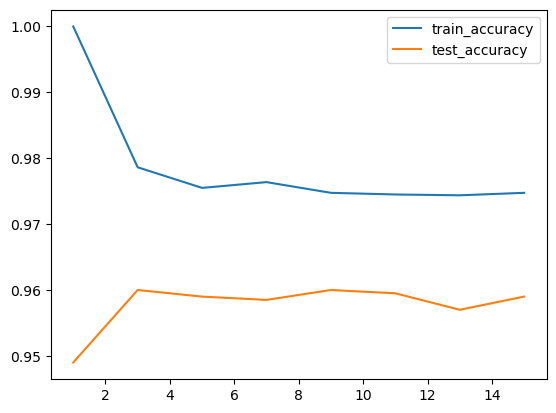

In [29]:
k_values = list(range(1,16,2))
plt.plot(k_values, train_accuracies)
plt.plot(k_values, test_accuracies)
plt.legend(["train_accuracy", "test_accuracy"])

### Fitting with initial optimal value of k

In [30]:
knn = KNeighborsClassifier(n_neighbors=9, metric = "euclidean")
knn.fit(X_train[["balanced_normalized", "income_normalized"]], y_train)
predictions = knn.predict(X_test[["balanced_normalized", "income_normalized"]])
test_accuracy = accuracy_score(y_test, predictions)
print("Accuracy on test data: ",test_accuracy)
train_predictions = knn.predict(X_train[["balanced_normalized", "income_normalized"]])
train_accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy on training data: ", train_accuracy)

Accuracy on test data:  0.96
Accuracy on training data:  0.97475


### Validation Split
### 1.Simple train and validation split

In [31]:
X_train.shape


(8000, 4)

In [32]:
y_train.shape

(8000,)

In [33]:
x_train, x_val, y_train_new, y_val = train_test_split(X_train[["balanced_normalized", "income_normalized"]], y_train, test_size=0.2, random_state=42)

In [34]:
print("Size of training data: ", x_train.shape[0])
print("Size of validation data: ", x_val.shape[0])

Size of training data:  6400
Size of validation data:  1600


In [35]:
train_accuracies = []
val_accuracies = []
for i in range(1,16,2):
    knn = KNeighborsClassifier(n_neighbors=i, metric = "euclidean")
    knn.fit(x_train, y_train_new)
    val_predictions = knn.predict(x_val)
    val_accuracy = accuracy_score(y_val, val_predictions)
    val_accuracies.append(val_accuracy)
    train_predictions = knn.predict(x_train)
    train_accuracy = accuracy_score(y_train_new, train_predictions)
    train_accuracies.append(train_accuracy)
    

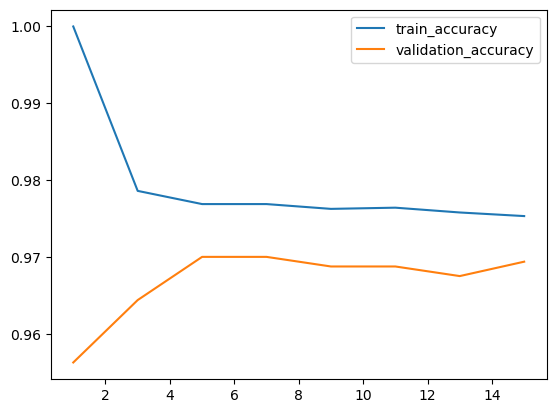

In [36]:
k_values = list(range(1,16,2))
plt.plot(k_values, train_accuracies)
plt.plot(k_values, val_accuracies)
plt.legend(["train_accuracy", "validation_accuracy"])

In [37]:
#fitting with optimal value of k
knn=KNeighborsClassifier(n_neighbors=5, metric="euclidean")
knn.fit(x_train, y_train_new)
val_predictions = knn.predict(x_val)
val_accuracy = accuracy_score(y_val, val_predictions)
val_accuracy

0.97

In [38]:
predictions = knn.predict(X_test[["balanced_normalized","income_normalized"]])
test_accuracy = accuracy_score(y_test, predictions)
test_accuracy

0.96

### 2.Cross Validation

In [39]:
from sklearn.model_selection import cross_validate

In [40]:
knn = KNeighborsClassifier(n_neighbors=5, metric="euclidean")

In [41]:
cv_results=cross_validate(knn, X_train[["balanced_normalized","income_normalized"]], y_train, cv=5, return_train_score=True)
cv_results

{'fit_time': array([0.0115428 , 0.01589298, 0.01604438, 0.01055741, 0.01996827]),
 'score_time': array([0.08301711, 0.09459043, 0.08059025, 0.08376765, 0.10610533]),
 'test_score': array([0.974375, 0.96625 , 0.97125 , 0.965625, 0.971875]),
 'train_score': array([0.9740625 , 0.97703125, 0.97640625, 0.97671875, 0.97546875])}

In [42]:
print("Training data accuracy: ", cv_results["train_score"].mean()*100)
print("Validation data average accuracy: ", cv_results["test_score"].mean()*100)

Training data accuracy:  97.59375
Validation data average accuracy:  96.98750000000001


### Hyper-parameter using GridSearch

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
knn = KNeighborsClassifier(metric="euclidean")

In [45]:
para=np.arange(1,16,2)

In [46]:
param_grid = {"n_neighbors" : para}

In [47]:
knn_with_gs = GridSearchCV(knn, param_grid, return_train_score = True, verbose=1, scoring="accuracy")

In [48]:
knn_with_gs.fit(X_train[["balanced_normalized","income_normalized"]], y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(estimator=KNeighborsClassifier(metric='euclidean'),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15])},
             return_train_score=True, scoring='accuracy', verbose=1)

In [49]:
knn_with_gs.cv_results_

{'mean_fit_time': array([0.00806274, 0.01020594, 0.01618805, 0.00902414, 0.00743704,
        0.01684723, 0.01572285, 0.0119657 ]),
 'std_fit_time': array([0.00390562, 0.00715119, 0.00919847, 0.0065588 , 0.00529907,
        0.00423688, 0.00052934, 0.00464853]),
 'mean_score_time': array([0.07465134, 0.10458446, 0.09799047, 0.08699827, 0.0919775 ,
        0.1036902 , 0.11361895, 0.08833942]),
 'std_score_time': array([0.01010068, 0.0289128 , 0.01353595, 0.01325987, 0.00994106,
        0.01524074, 0.03709538, 0.0117969 ]),
 'param_n_neighbors': masked_array(data=[1, 3, 5, 7, 9, 11, 13, 15],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 3},
  {'n_neighbors': 5},
  {'n_neighbors': 7},
  {'n_neighbors': 9},
  {'n_neighbors': 11},
  {'n_neighbors': 13},
  {'n_neighbors': 15}],
 'split0_test_score': array([0.95875 , 0.970625, 0.974375, 0.975   , 0.97625 , 0.97562

In [50]:
knn_with_gs.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [51]:
tuned_df = pd.DataFrame(knn_with_gs.cv_results_)
tuned_df = tuned_df[["param_n_neighbors", "mean_train_score", "mean_test_score"]]
tuned_df

,param_n_neighbors,mean_train_score,mean_test_score
0,1,1.000000,0.955375
1,3,0.978437,0.966750
2,5,0.975938,0.969875
3,7,0.975969,0.970875
4,9,0.975125,0.973250
5,11,0.974781,0.973500
6,13,0.975000,0.973125
7,15,0.974719,0.972625


In [52]:
knn_9 = KNeighborsClassifier(n_neighbors = 11, metric = "euclidean")
knn_9.fit(X_train[["balanced_normalized","income_normalized"]], y_train)
predictions = knn_9.predict(X_test[["balanced_normalized","income_normalized"]])
test_accuracy = accuracy_score(y_test, predictions)
test_accuracy

0.9595

### Precision & Recall

In [53]:
from sklearn.metrics import precision_score, recall_score

In [54]:
precision_score(y_test, predictions, pos_label = "Yes")

0.4142857142857143

In [56]:
recall_score(y_test, predictions, pos_label = "Yes")

0.42028985507246375

In [55]:
recall_score(y_test, predictions, pos_label = "No")

0.9787674779906784

### F1-score

In [57]:
from sklearn.metrics import f1_score

In [58]:
f1_score(y_test, predictions, pos_label="No")

0.9790209790209791

In [59]:
f1_score(y_test, predictions, pos_label = "Yes")

0.4172661870503597

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          No       0.98      0.98      0.98      1931
         Yes       0.41      0.42      0.42        69

    accuracy                           0.96      2000
   macro avg       0.70      0.70      0.70      2000
weighted avg       0.96      0.96      0.96      2000

